# Model Training

#### Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor


#### Import CSV Data

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Creating X and y columns

In [5]:
X = df[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score',
       'writing_score']]

y = df['math_score']

#### Checking How many unique values are in each column

In [6]:
for column in df.columns:
    print('column name: ', column)
    print(df[column].nunique())
    print(df[column].unique())
    print('-'*60)

column name:  gender
2
['female' 'male']
------------------------------------------------------------
column name:  race_ethnicity
5
['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------------------------
column name:  parental_level_of_education
6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------------------------
column name:  lunch
2
['standard' 'free/reduced']
------------------------------------------------------------
column name:  test_preparation_course
2
['none' 'completed']
------------------------------------------------------------
column name:  math_score
81
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  9

# Feature Engineering

In [7]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder ', ohe, cat_features),
        ('Standard Scaler ', ss, num_features),
    ]
)


In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [15]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 19)
(200, 19)
(800,)
(200,)


In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

In [28]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Ada BoostRegressor' : AdaBoostRegressor(),
    'CatBoost Regressor' : CatBoostRegressor(verbose=False)
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    #Evaluate Training and Testing dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_prediction)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_prediction)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Performance for Training set')
    print('- Root Mean Squared Error : {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error :{:.4f}'.format(model_train_mae))
    print('- R2 Score :{:.4f}'.format(model_train_r2))


    print('-'*60)

    print('Model Performance for Testing set')
    print('- Root Mean Squared Error : {:.4f}'.format(model_test_rmse))
    print('- Mean Absoulute Error : {:.4f}'.format(model_test_mae))
    print('- R2 Score : {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)


    print('='*60)
    print('\n')

Linear Regression
Model Performance for Training set
- Root Mean Squared Error : 28.3627
- Mean Absolute Error :4.2695
- R2 Score :0.8742
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 29.3889
- Mean Absoulute Error : 4.2347
- R2 Score : 0.8792


Lasso
Model Performance for Training set
- Root Mean Squared Error : 43.4784
- Mean Absolute Error :5.2063
- R2 Score :0.8071
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 42.5064
- Mean Absoulute Error : 5.1579
- R2 Score : 0.8253


Ridge
Model Performance for Training set
- Root Mean Squared Error : 28.3378
- Mean Absolute Error :4.2650
- R2 Score :0.8743
------------------------------------------------------------
Model Performance for Testing set
- Root Mean Squared Error : 29.0563
- Mean Absoulute Error : 4.2111
- R2 Score : 0.8806


K-Neighbors Regressor
Model Performance for Training se

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R2 Score']).sort_values(by = ['R2 Score'], ascending=False)

,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879226
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.851526
6,Ada BoostRegressor,0.842657
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.737300


## Linear Regression

In [32]:
lr = LinearRegression(fit_intercept= True)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

score = r2_score(y_test, y_pred)*100

print('Accuracy of model %.2f' %score)


Accuracy of model 87.92


### Plotting Acutal and Predicted Values

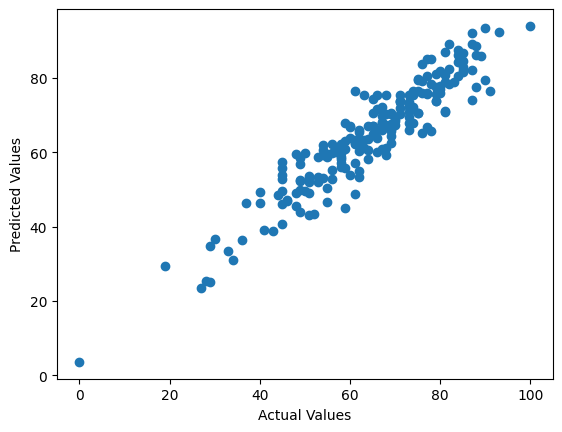

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<Axes: xlabel='math_score'>

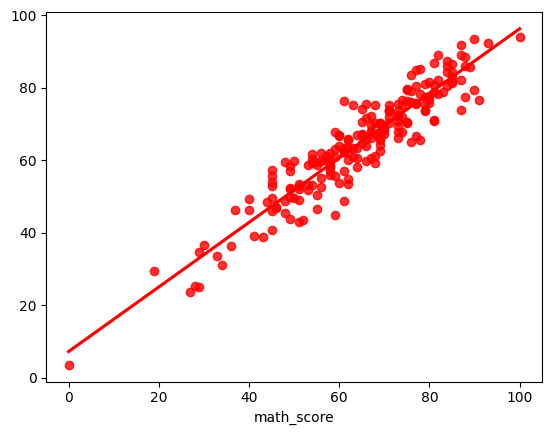

In [37]:
sns.regplot(x=y_test, y = y_pred, ci = None, color = 'red')

In [38]:
pred_df = pd.DataFrame({'Actual Values' : y_test, 'Predicted Values' : y_pred, 'Difference' : y_test - y_pred})

In [42]:
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
